In [3]:
%load_ext autoreload
%autoreload 2

import sys
import pandas
sys.path.append("..")
#import pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy import random
from scipy.integrate import odeint

warnings.filterwarnings('ignore')
import os

plotsdir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Mechanics/Plots/'
datadir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Mechanics/Data/'
datadir2  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Relaxation/Data/'

import sys

# Check the current recursion limit
current_limit = sys.getrecursionlimit()
print("Current recursion limit:", current_limit)
clrs = ['#a6611a','#dfc27d','#80cdc1','#018571','steelblue','slateblue']
cmap = plt.get_cmap('twilight')
# Increase the recursion limit
sys.setrecursionlimit(6000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current recursion limit: 6000


In [13]:
def phiform(phi0,phi_inf,tau,t):
    if tau==0:
        phi = phi_inf
    else:
        phi = (phi0)*np.exp(-t/tau)+phi_inf
    return phi

def intersection(y,y0):
    diff = []
    for i in range(len(y)):
        diff.append(float((y[i]-y0)*(y[i]-y0)))
    diff2 = sorted(diff)
    x = diff.index(diff2[0])
    return x , diff[x]

## Standard linear elastic solid
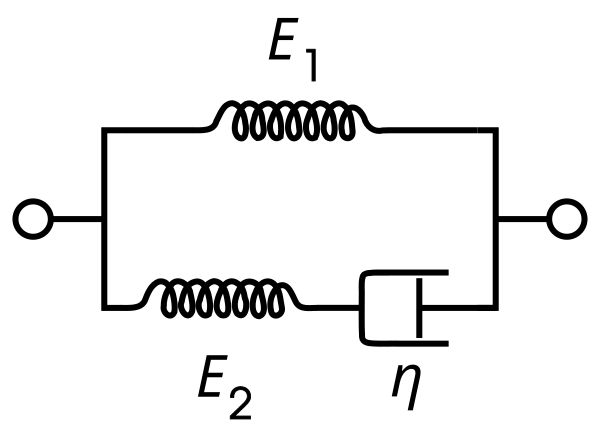

# relations #
sigTot = sigM+sig1
epTot = epM
ep1 = epM
sigM = sig2
sigD = sig2
epM = ep2+epD# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt
#sigma + eta/E2 *sigma_dot = E1*epsilon + (eta(E1+E2)/(E2))*epsilon_dot

## Input is strain : 
#- Stage 1 epslion_dot = const, epsilon = const*t
#- Stage 2 epslion_dot = 0, epsilon = epsmax


In [41]:
# function that returns dy/dt
def shorttimes(y,t):
    #E1 = 1
    #E2 = 1
    #eta = 1
    P1 = (eta*(E1+E2)/(E2))
    strainrate = 1
    epsilon = strainrate*t
    epsilon_dot = strainrate
    dydt = (E2/eta)*(E1*epsilon+P1*epsilon_dot-y)
    return dydt

def longtimes(y,t):
    #E1 = 1
    #E2 = 1
    #eta = 1
    P1 = (eta*(E1+E2)/(E2))
    strainrate = 1
    maxstrain = strainrate*t1[-1]
    epsilon = maxstrain
    epsilon_dot = 0
    dydt = (E2/eta)*(E1*epsilon+P1*epsilon_dot-y)
    return dydt

[ 1.          7.33333333 13.66666667 20.        ]


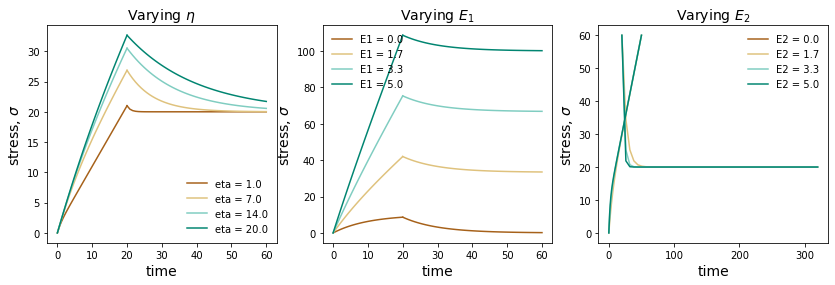

In [21]:
E1 = 1
E2 = 1
etas = np.linspace(1,20,4)
fig,ax = plt.subplots(1,3,figsize  = (14,4))
## Varying eta
print(etas)
for i in range(len(etas)):
    eta = etas[i]

    # initial condition
    y0 = 0
    # time points
    t1 = np.linspace(0,20)
    # solve ODE
    yS = odeint(shorttimes,y0,t1)
    t2 = np.linspace(0,40)
    yL = odeint(longtimes,yS[-1],t2)

    # plot results
    ax[0].plot(t1,yS,color = clrs[i])
    ax[0].plot(t2+20,yL,color = clrs[i],label = 'eta = '+str(np.round(eta,0)))
ax[0].set_xlabel('time',fontsize = 14)
ax[0].set_ylabel(r'stress, $\sigma$',fontsize = 14)
ax[0].set_title(r'Varying $\eta$',fontsize = 14)

ax[0].legend(frameon=False)
    
## Varying E1
eta = 10
E1s = np.linspace(0,5,4)
for i in range(len(E1s)):
    E1 = E1s[i]

    # initial condition
    y0 = 0
    # time points
    t1 = np.linspace(0,20)
    # solve ODE
    yS = odeint(shorttimes,y0,t1)
    t2 = np.linspace(0,40)

    yL = odeint(longtimes,yS[-1],t2)

    # plot results
    ax[1].plot(t1,yS,color = clrs[i])
    ax[1].plot(t2+20,yL,color = clrs[i],label = 'E1 = '+str((np.round(E1,1))))
ax[1].set_xlabel('time',fontsize = 14)
ax[1].set_ylabel(r'stress, $\sigma$',fontsize = 14)
ax[1].set_title(r'Varying $E_{1}$',fontsize = 14)

ax[1].legend(frameon=False)


## Varying E2
eta = 10
E1 = 1
E2s = np.linspace(0,5,4)
for i in range(len(E2s)):
    E2 = E2s[i]

    # initial condition
    y0 = 0
    # time points
    t1 = np.linspace(0,50)
    # solve ODE
    yS = odeint(shorttimes,y0,t1)
    t2 = np.linspace(0,300)

    yL = odeint(longtimes,yS[-1],t2)

    # plot results
    ax[2].plot(t1,yS,color = clrs[i])
    ax[2].plot(t2+20,yL,color = clrs[i],label = 'E2 = '+str((np.round(E2,1))))
ax[2].set_xlabel('time',fontsize = 14)
ax[2].set_ylabel(r'stress, $\sigma$',fontsize = 14)
ax[2].set_title(r'Varying $E_{2}$',fontsize = 14)

ax[2].legend(frameon=False)
#plt.show()

1.0 100.0 tau/t1 =  1.0
0.4 100.0 tau/t1 =  1.0
0.25 100.0 tau/t1 =  1.0
1.0 100.0 tau/t1 =  1.0
0.4 100.0 tau/t1 =  1.0
0.25 100.0 tau/t1 =  1.0
1.0 100.0 tau/t1 =  1.0
0.4 100.0 tau/t1 =  1.0
0.25 100.0 tau/t1 =  1.0
10.5 100.0 tau/t1 =  0.9999269093074206
4.2 100.0 tau/t1 =  0.9999999999543274
2.625 100.0 tau/t1 =  1.0
10.5 100.0 tau/t1 =  0.9999269093074206
4.2 100.0 tau/t1 =  0.9999999999543274
2.625 100.0 tau/t1 =  1.0
10.5 100.0 tau/t1 =  0.9999269093074206
4.2 100.0 tau/t1 =  0.9999999999543274
2.625 100.0 tau/t1 =  1.0
20.0 100.0 tau/t1 =  0.9932620530009145
8.0 100.0 tau/t1 =  0.999996273346828
5.0 100.0 tau/t1 =  0.9999999979388464
20.0 100.0 tau/t1 =  0.9932620530009145
8.0 100.0 tau/t1 =  0.999996273346828
5.0 100.0 tau/t1 =  0.9999999979388464
20.0 100.0 tau/t1 =  0.9932620530009145
8.0 100.0 tau/t1 =  0.999996273346828
5.0 100.0 tau/t1 =  0.9999999979388464


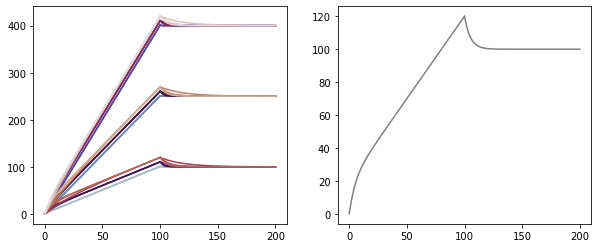

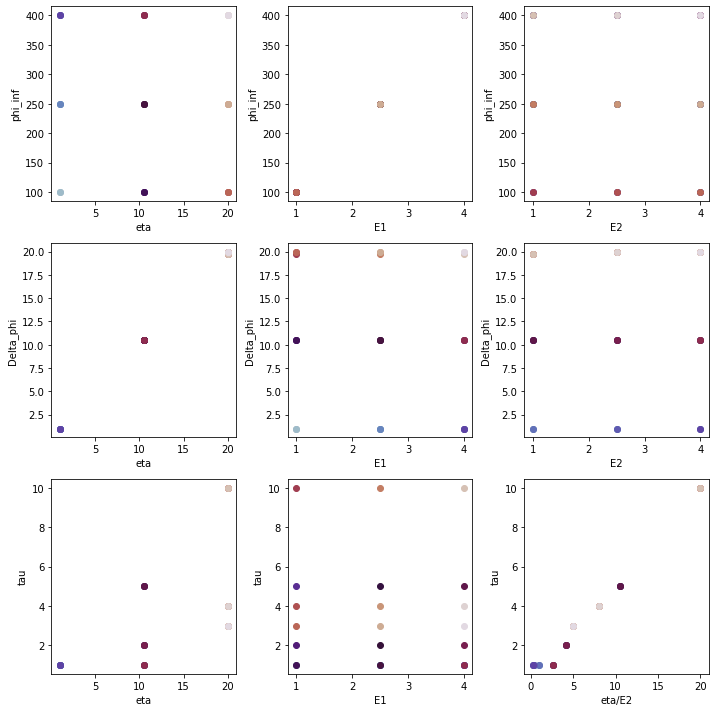

In [45]:
# plot DeltaStress and tau against eta, E1 and E2
etas = np.linspace(1,20,3)
E1s = np.linspace(1,4,3)
E2s = np.linspace(1,4,3)
totcc = len(etas)*len(E1s)*len(E2s)
cc=0
fig,ax = plt.subplots(1,2,figsize=(10,4))
fig2,ax2 = plt.subplots(3,3,figsize = (10,10))
for i in range(len(etas)):
    for ii in range(len(E1s)):
        for iii in range(len(E2s)):
            cc+=1
            eta = etas[i]
            E1 = E1s[ii]
            E2 = E2s[iii]
            
            # initial condition
            y0 = 0
            # time points
            t1 = np.linspace(0,100)
            # solve ODE
            yS = odeint(shorttimes,y0,t1) #stretching 
            t2 = np.linspace(0,100)
            yL = odeint(longtimes,yS[-1],t2) #relaxing
            clr = cmap(cc/totcc)
            print(eta/E2,t1[-1], 'tau/t1 = ',1-np.exp(-E2*t1[-1]/eta))
            phi_inf = yL[-1]
            phi0 = yS[-1]-phi_inf
            phiTau = phi0/np.exp(1) + phi_inf
            #AvMSqD =AvMSq[t_postStretch:]
            tau = intersection(yL,phiTau)[0]
            
            ax[0].plot(t1,yS,color = clr)
            ax[0].plot(t2+t1[-1],yL,color = clr,label = r'$\eta$ = '+str((np.round(eta,1)))+ 'E1 = '+str((np.round(E1,1)))+ 'E2 = '+str((np.round(E2,1))))
            if i==2 and ii==0 and iii==2:
                ax[1].plot(t1,yS,color = 'grey')
                ax[1].plot(t2+t1[-1],yL,color = 'grey',label = r'$\eta$ = '+str((np.round(eta,1)))+ 'E1 = '+str((np.round(E1,1)))+ 'E2 = '+str((np.round(E2,1))))
            ax2[0,0].plot(eta,yL[-1],marker = 'o',color = clr)
            ax2[0,1].plot(E1,yL[-1],marker = 'o',color = clr)
            ax2[0,2].plot(E2,yL[-1],marker = 'o',color = clr)
            ax2[1,0].plot(eta,yS[-1]-yL[-1],marker = 'o',color = clr)
            ax2[1,1].plot(E1,yS[-1]-yL[-1],marker = 'o',color = clr)
            ax2[1,2].plot(E2,yS[-1]-yL[-1],marker = 'o',color = clr)
            ax2[2,0].plot(eta,tau,marker = 'o',color = clr)
            ax2[2,1].plot(E1,tau,marker = 'o',color = clr)
            ax2[2,2].plot(eta/E2,tau,marker = 'o',color = clr)
            
            #ax2[2,0].plot(eta,tau,marker = 'o',color = clr)
            #ax2[2,1].plot(E1,tau,marker = 'o',color = clr)
            #ax2[2,2].plot(E2,tau,marker = 'o',color = clr)
            
ax2[0,0].set_ylabel('phi_inf')
ax2[0,1].set_ylabel('phi_inf')
ax2[0,2].set_ylabel('phi_inf')

ax2[1,0].set_ylabel('Delta_phi')
ax2[1,1].set_ylabel('Delta_phi')
ax2[1,2].set_ylabel('Delta_phi')

ax2[2,0].set_ylabel('tau')
ax2[2,1].set_ylabel('tau')
ax2[2,2].set_ylabel('tau')

ax2[0,0].set_xlabel('eta')
ax2[0,1].set_xlabel('E1')
ax2[0,2].set_xlabel('E2')

ax2[1,0].set_xlabel('eta')
ax2[1,1].set_xlabel('E1')
ax2[1,2].set_xlabel('E2')

ax2[2,0].set_xlabel('eta')
ax2[2,1].set_xlabel('E1')

ax2[2,2].set_xlabel('eta/E2')
fig2.tight_layout()




In [8]:
def phiform(phi0,phi_inf,tau,t):
    if tau==0:
        phi = phi_inf
    else:
        phi = (phi0)*np.exp(-t/tau)+phi_inf
    return phi

def intersection(y,y0):
    diff = []
    for i in range(len(y)):
        diff.append(float((y[i]-y0)*(y[i]-y0)))
    diff2 = sorted(diff)
    x = diff.index(diff2[0])
    return x , diff[x]

Text(0.5, 1.0, '$\\tau = $18480')

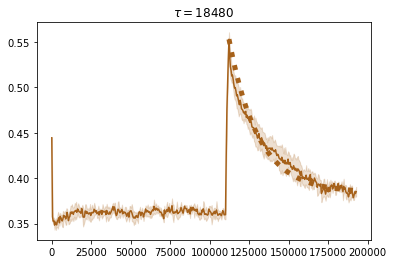

In [9]:
##--- reading data ---#

file = 'alignment.dat'
#Time AvMSq AvMSqStd
almnt = pandas.read_csv(datadir+file, sep = ' ', header = 'infer')

time = almnt.Time
AvMSq_ = almnt.AvMSq
AvMSq = AvMSq_.values
AvMSqStd = almnt.AvMSqStd

##--- fitting exponential ---#
t_postStretch = 255
LastTs = 20 
phi_inf = np.mean(AvMSq[-LastTs:])
phi0 = AvMSq[t_postStretch]-phi_inf
phiTau = phi0/np.exp(1) + phi_inf
AvMSqD =AvMSq[t_postStretch:]
tau = intersection(AvMSqD,phiTau)[0]
phiTheory = []
for tt in range(len(time[t_postStretch:])):
    t = time[tt]
    phiTheory.append(phiform(phi0,phi_inf,tau,t))
    
##---plotting ---#    
    
fig,ax = plt.subplots()
ax.plot(np.multiply(time[t_postStretch:],frame),phiTheory,color = clrs[0],linestyle = ':',linewidth = 5)
ax.plot(np.multiply(time,frame),AvMSq,color = clrs[0])
ax.fill_between(np.multiply(time,frame),np.add(AvMSq,AvMSqStd),np.add(AvMSq,-AvMSqStd),alpha = 0.2,color = clrs[0])
ax.set_title(r'$\tau = $'+str(time[tau]*frame)) #+time[t_postStretch]*frame)



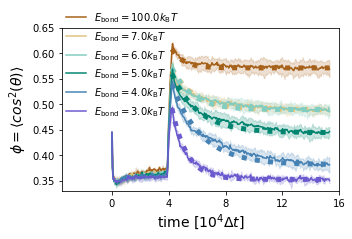

In [10]:
fs = 14
fig,ax = plt.subplots(figsize = (5,3.3))
frame = 440
ChemEngs = "100.0 7.0 6.0 5.0 4.0 3.0".split() #3.0 4.0 5.0 6.0 7.0 100.0
tausalnt = []
for e in range(len(ChemEngs)):
    file = 'alignmentrelax_E'+str(ChemEngs[e])+'.dat'
    almnt = pandas.read_csv(datadir2+file, sep = ' ', header = 'infer')
    time = almnt.Time
    AvMSq_ = almnt.AvMSq
    AvMSq = AvMSq_.values
    AvMSqStd = almnt.AvMSqStd
    t_postStretch = 96
    LastTs = 20 
    phi_inf = np.mean(AvMSq[-LastTs:])
    phi0 = AvMSq[t_postStretch]-phi_inf
    phiTau = phi0/np.exp(1) + phi_inf
    AvMSqD =AvMSq[t_postStretch:]
    tau = intersection(AvMSqD,phiTau)[0]
    phiTheory = []
    for tt in range(len(time[t_postStretch:])):
        t = time[tt]
        phiTheory.append(phiform(phi0,phi_inf,tau,t))
    if e==2:
        AvMsqSave = AvMSq
        AvMsqStdSave = AvMSqStd
        phiThSave, tauSave, phiinfSave,phi0Save = phiTheory,tau,phi_inf,phi0
    tausalnt.append(tau)
    ax.plot(np.multiply(time,frame),AvMSq,color = clrs[e],label = r'$E_{\mathrm{bond}} = $'+ChemEngs[e]+r'$k_{\mathrm{B}}T$')
    ax.fill_between(np.multiply(time,frame),np.add(AvMSq,AvMSqStd),np.add(AvMSq,-AvMSqStd),alpha = 0.2,color = clrs[e])
    ax.plot(np.multiply(time[t_postStretch:],frame),phiTheory,color = clrs[e],linestyle = ':',linewidth = 5)

#ax.set_title("Stretch = 150%")
ax.set_xlabel(r"time [$10^{4}\Delta t$]",fontsize =fs)
ax.set_ylabel(r'$\phi = \langle cos^{2}(\theta)\rangle$',fontsize =fs)
ax.set_xticks([0,40000,80000,120000,160000],['0','4','8','12','16'])
ax.set_xlim([-35000,160000])
ax.set_ylim([0.33,0.65])
#ax.set_xlim([0,160000])
ax.legend(frameon=False,loc = [0.,0.42],fontsize=10)
fig.tight_layout()
#fig.savefig(plotsdir+'Multiple_Ebind_Relax.pdf')